 Langkah 1: Install library

In [ ]:
!pip install sastrawi wordcloud seaborn


 LANGKAH 2: Ekstrak File ZIP dan Import dan Load Data

In [ ]:
from google.colab import files
uploaded = files.upload()  # Pilih file bernama "archive (13).zip"


Saving archive (13).zip to archive (13) (2).zip


LANGKAH 3: Baca CSV

In [ ]:
import zipfile
import os

# Ganti sesuai nama file ZIP yang diupload
zip_path = "/content/archive (13).zip"

# Ekstrak ke folder /content/data
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data")

# Lihat isi folder hasil ekstrak
os.listdir("/content/data")


['valid_preprocess.tsv',
 'test_preprocess_masked_label.tsv',
 'train_preprocess_ori.tsv']

LANGKAH 4: Import libraries

In [ ]:
# Mengimpor pustaka untuk manipulasi data (membaca file .tsv, analisis, dsb.)
import pandas as pd

# Mengimpor pustaka untuk visualisasi grafik
import matplotlib.pyplot as plt

# Mengimpor pustaka untuk membuat visualisasi WordCloud (awan kata)
from wordcloud import WordCloud

# Mengimpor pustaka untuk membuat grafik heatmap, bar chart, dsb.
import seaborn as sns

# Mengimpor pustaka regular expression untuk membersihkan teks
import re

# Mengimpor fungsi untuk membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimpor metode untuk mengubah teks menjadi fitur numerik (bag-of-words)
from sklearn.feature_extraction.text import CountVectorizer

# Mengimpor model klasifikasi Naive Bayes khusus untuk data teks
from sklearn.naive_bayes import MultinomialNB

# Mengimpor metrik evaluasi model seperti akurasi, confusion matrix, dan laporan klasifikasi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Mengimpor pustaka Sastrawi untuk menghapus kata-kata tidak penting (stopword Bahasa Indonesia)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengimpor pustaka Sastrawi untuk melakukan stemming (mengembalikan kata ke bentuk dasarnya)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


In [ ]:
# Load dataset TSV
df = pd.read_csv("/content/data/train_preprocess_ori.tsv", sep='\t')


In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# Path file TSV
train_path = "/content/data/train_preprocess_ori.tsv"
valid_path = "/content/data/valid_preprocess.tsv"
test_path  = "/content/data/test_preprocess_masked_label.tsv"

# Baca masing-masing file sebagai DataFrame
df_train = pd.read_csv(train_path, sep='\t')
df_valid = pd.read_csv(valid_path, sep='\t')
df_test  = pd.read_csv(test_path, sep='\t')

# Tampilkan isi 5 data teratas dari setiap DataFrame
print(" Train Data:")
display(df_train.head())

print(" Validation Data:")
display(df_valid.head())

print(" Test Data:")
display(df_test.head())


 Train Data:


,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


 Validation Data:


,text,sentiment
0,"meski masa kampanye sudah selesai , bukan bera...",neutral
1,tidak enak,negative
2,restoran ini menawarkan makanan sunda . kami m...,positive
3,lokasi di alun alun masakan padang ini cukup t...,positive
4,betapa bejad kader gerindra yang anggota dprd ...,negative


 Test Data:


,text,sentiment
0,kemarin gue datang ke tempat makan baru yang a...,neutral
1,kayak nya sih gue tidak akan mau balik lagi ke...,neutral
2,"kalau dipikir-pikir , sebenarnya tidak ada yan...",neutral
3,ini pertama kalinya gua ke bank buat ngurusin ...,neutral
4,waktu sampai dengan gue pernah disuruh ibu lat...,neutral


Langkah 5: Preprocessing Teks



In [ ]:
# 3. Preprocessing

# Inisialisasi pustaka stopword Bahasa Indonesia dari Sastrawi
stop_factory = StopWordRemoverFactory()

# Mengambil daftar stopword dan mengubahnya menjadi set untuk efisiensi
stopwords = set(stop_factory.get_stop_words())

# Inisialisasi stemmer untuk mengubah kata ke bentuk dasar (misal: "berlari" → "lari")
stemmer = StemmerFactory().create_stemmer()

# Fungsi untuk membersihkan dan memproses teks
def preprocess_text(text):
    # Pastikan teks dalam format string dan ubah ke huruf kecil
    text = str(text).lower()

    # Menghapus URL atau tautan dari teks
    text = re.sub(r"http\S+|www.\S+", "", text)

    # Menghapus karakter non-alfabet seperti angka dan simbol
    text = re.sub(r"[^a-zA-Z\s]", " ", text)

    # Menghapus spasi berlebih dan menormalkan jarak antar kata
    text = re.sub(r"\s+", " ", text)

    # Memisahkan teks menjadi kata-kata individual (token)
    words = text.split()

    # Menghapus stopword dan melakukan stemming pada setiap kata
    words = [stemmer.stem(word) for word in words if word not in stopwords]

    # Menggabungkan kembali kata-kata yang sudah diproses
    return " ".join(words)

# Menerapkan fungsi preprocessing ke setiap baris pada kolom 'text'
# dan menyimpannya ke kolom baru bernama 'clean_text'
df['clean_text'] = df['text'].apply(preprocess_text)


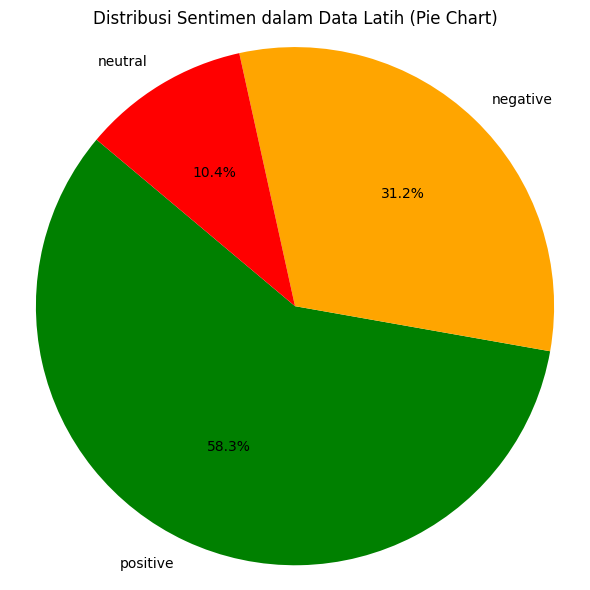

In [ ]:
# PIE CHART Distribusi Sentimen di df_train

# Hitung jumlah per label
label_counts = df_train['sentiment'].value_counts()

# Membuat canvas visualisasi dengan ukuran 6x6 inci
plt.figure(figsize=(6, 6))

# Membuat pie chart dari distribusi label
plt.pie(
    label_counts,              # Jumlah tiap sentimen
    labels=label_counts.index, # Label sentimen (positive/negative/neutral)
    autopct='%1.1f%%',         # Menampilkan persentase dengan 1 desimal
    startangle=140,            # Sudut awal pie chart diputar 140 derajat
    colors=['green', 'orange', 'red']  # Warna untuk setiap kategori
)
# Menambahkan judul pada pie chart
plt.title("Distribusi Sentimen dalam Data Latih (Pie Chart)")

# Mengatur sumbu agar proporsional (membuat pie chart bulat sempurna)
plt.axis('equal')

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()

# Menampilkan pie chart di output
plt.show()



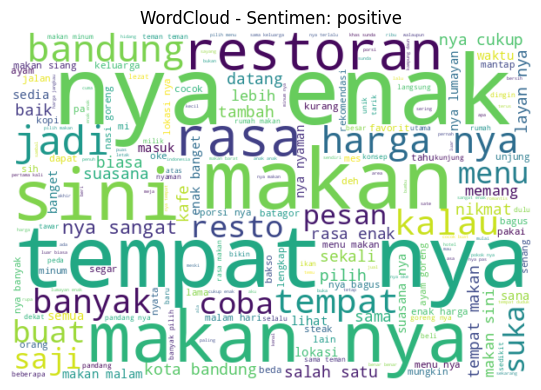

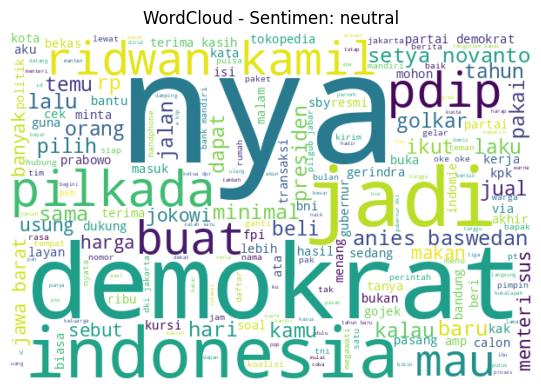

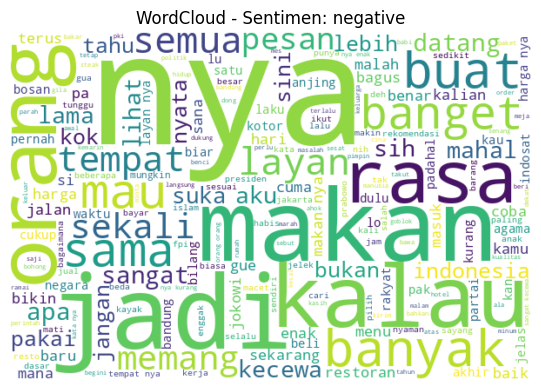

In [ ]:
# Wordcloud per kategori sentimen dari df
for sentiment in df['sentiment'].unique():
       # Menggabungkan semua teks (clean_text) yang termasuk dalam kategori sentimen saat ini
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    # Membuat WordCloud dari teks gabungan
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
    # Membuat plot WordCloud
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')  # Menampilkan WordCloud
    plt.axis('off')  # Menghilangkan sumbu/ticks
    plt.title(f"WordCloud - Sentimen: {sentiment}")  # Judul dinamis sesuai jenis sentimen
    plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
    plt.show()  # Menampilkan WordCloud



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Vectorisasi teks
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']  #  ini nama kolom yang benar

# Bagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediksi hasil
y_pred = model.predict(X_test)
print(" Model telah dilatih dan prediksi selesai.")
print("Contoh prediksi:", y_pred[:5])



 Model telah dilatih dan prediksi selesai.
Contoh prediksi: ['positive' 'neutral' 'positive' 'positive' 'negative']


 Akurasi Model: 83.18%


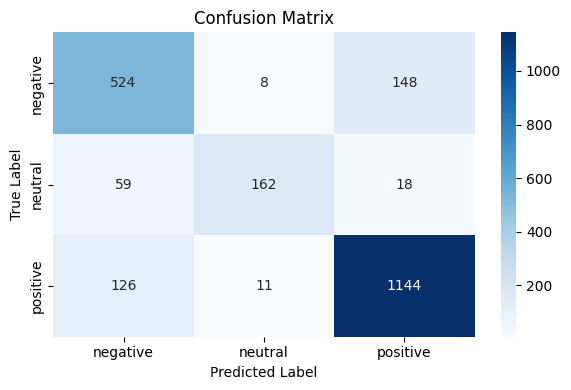

📋 Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.77      0.75       680
     neutral       0.90      0.68      0.77       239
    positive       0.87      0.89      0.88      1281

    accuracy                           0.83      2200
   macro avg       0.84      0.78      0.80      2200
weighted avg       0.83      0.83      0.83      2200



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung metrik
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=model.classes_)

# 1. Akurasi
print(" Akurasi Model: {:.2f}%".format(acc * 100))

# 2. Confusion Matrix - Visualisasi
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 3. Tampilkan Classification Report
print("📋 Classification Report:")
print(report)
